In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


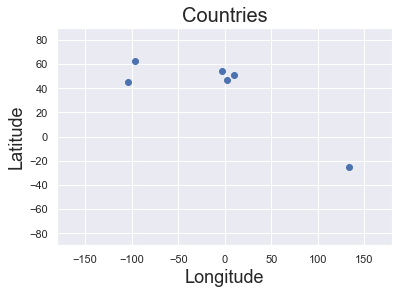

In [10]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.title("Countries", fontsize=20)
plt.xlim(-180,180)
plt.xlabel("Longitude", fontsize=18)
plt.ylim(-90,90)
plt.ylabel("Latitude", fontsize=18)
plt.show()

In [11]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [18]:
kmeans = KMeans(3)

In [19]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [20]:
identified_clusters = kmeans.fit_predict(x)

In [21]:
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [22]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


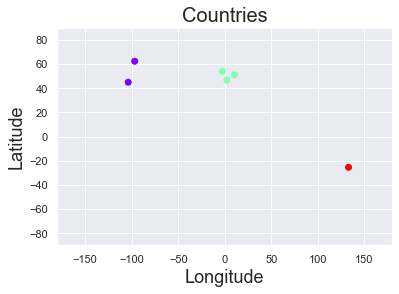

In [23]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.title("Countries", fontsize=20)
plt.xlim(-180,180)
plt.xlabel("Longitude", fontsize=18)
plt.ylim(-90,90)
plt.ylabel("Latitude", fontsize=18)
plt.show()

In [24]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [26]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({"English":0, "French":1, "German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [38]:
new_x = data_mapped.iloc[:, 1:4]
new_x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [49]:
kmeans2 = KMeans(2)

In [50]:
kmeans2.fit(new_x)

KMeans(n_clusters=2)

In [51]:
clusters = kmeans.fit_predict(new_x)
clusters

array([2, 2, 0, 0, 0, 1])

In [52]:
data2_with_clusters = data_mapped.copy()
data2_with_clusters['Cluster'] = clusters
data2_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


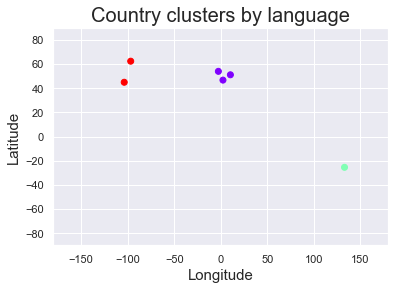

In [53]:
plt.scatter(data2_with_clusters['Longitude'], data2_with_clusters['Latitude'], c=data2_with_clusters['Cluster'], cmap='rainbow')
plt.title("Country clusters by language", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.xlim(-180, 180)
plt.ylabel("Latitude", fontsize=15)
plt.ylim(-90,90)
plt.show()